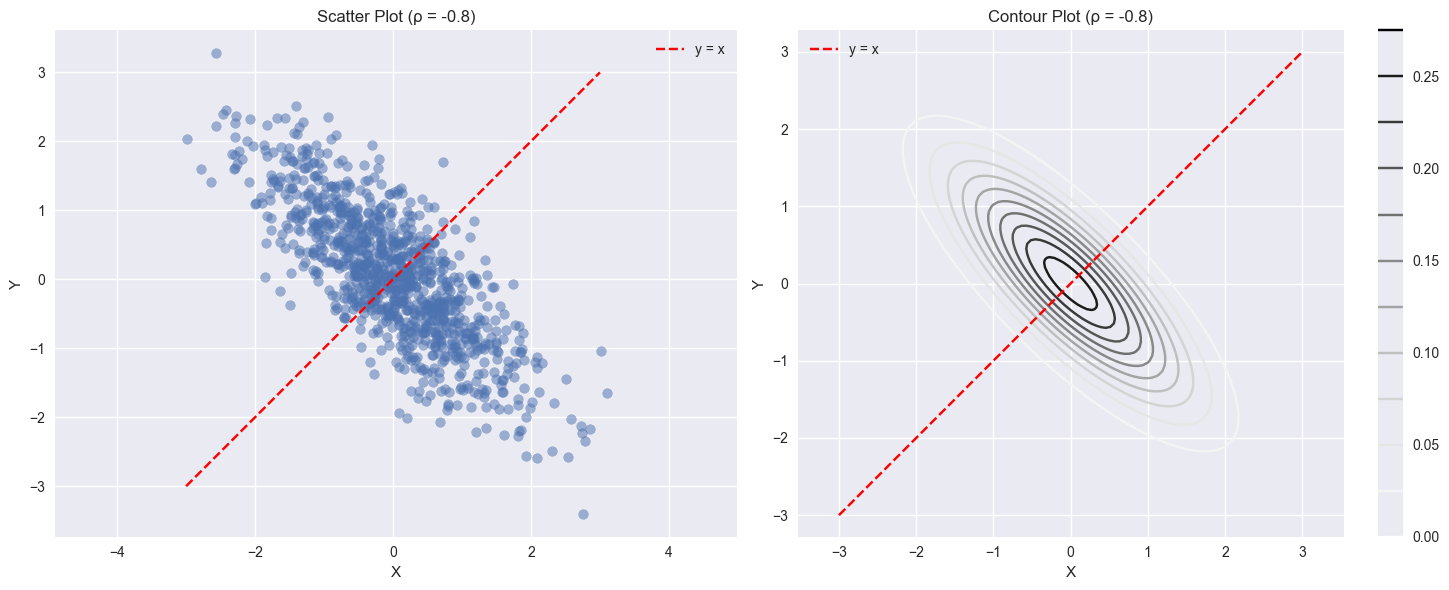

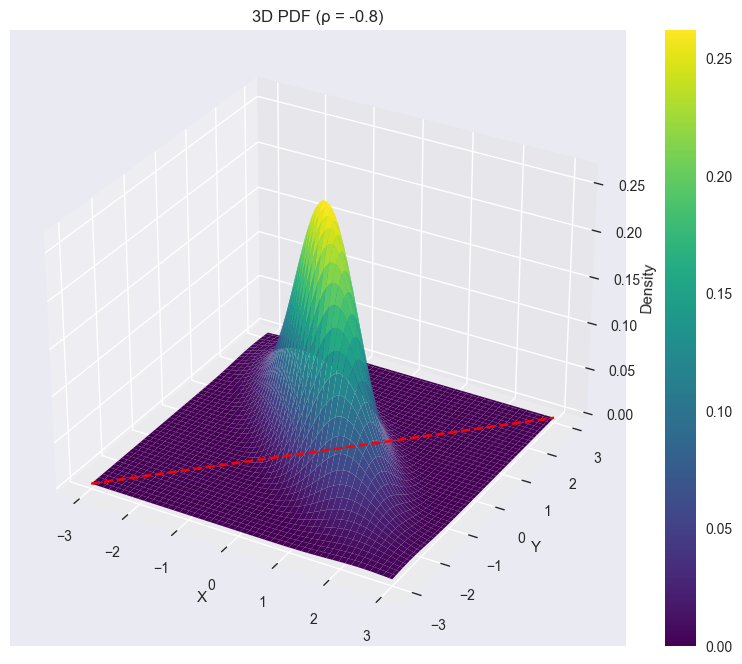

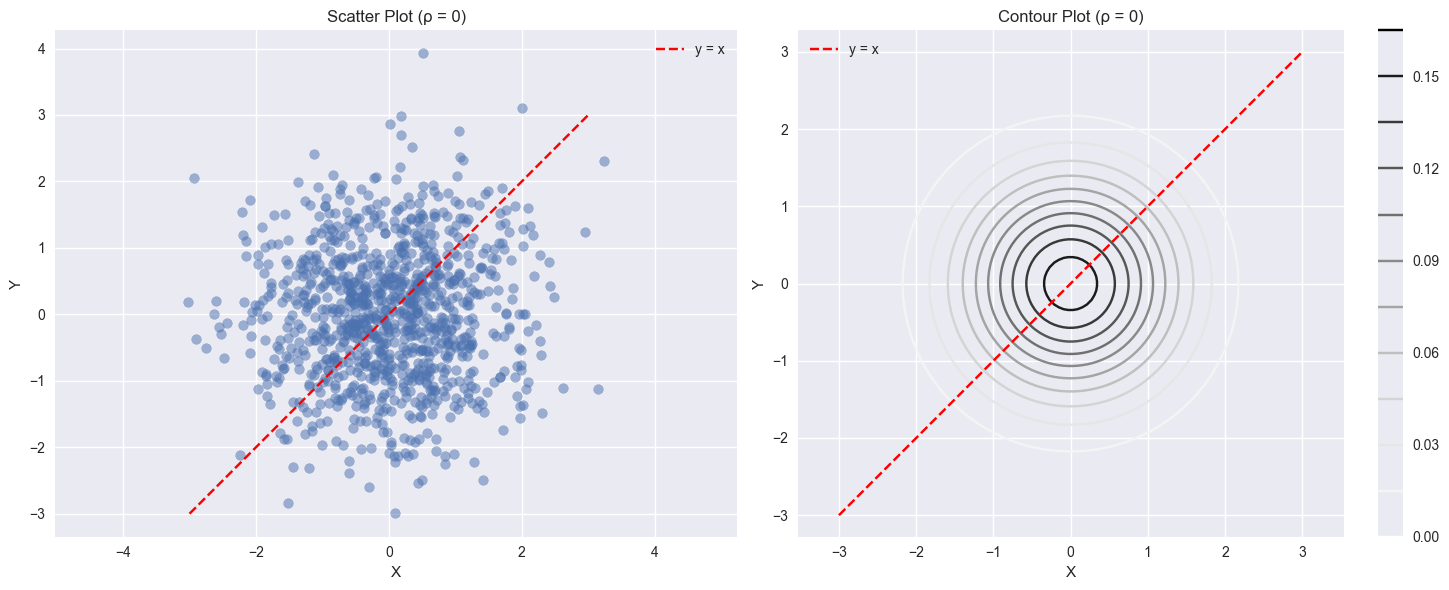

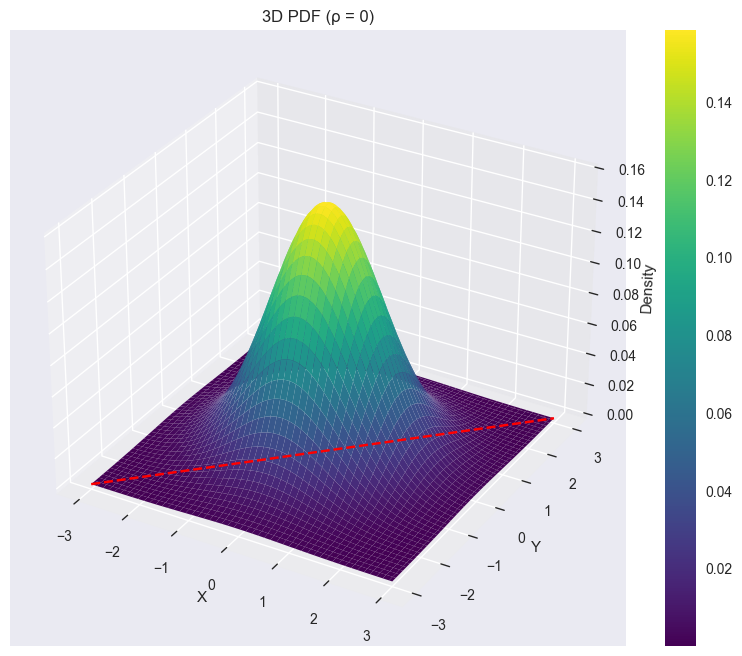

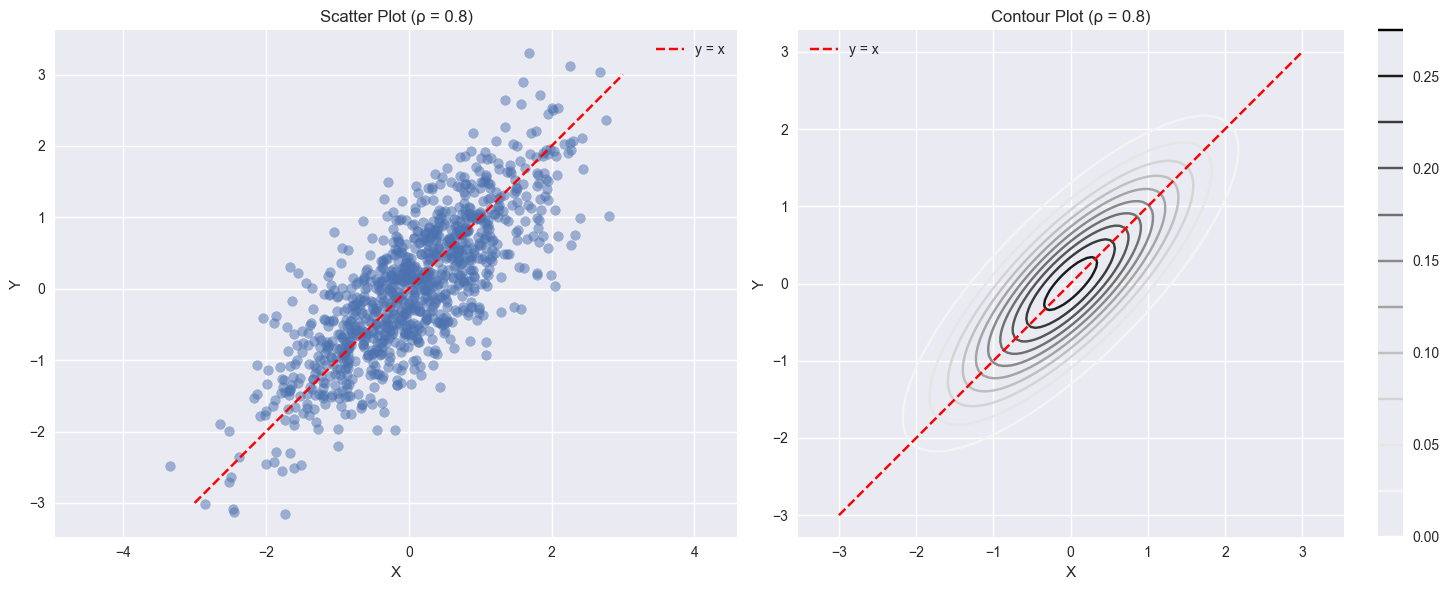

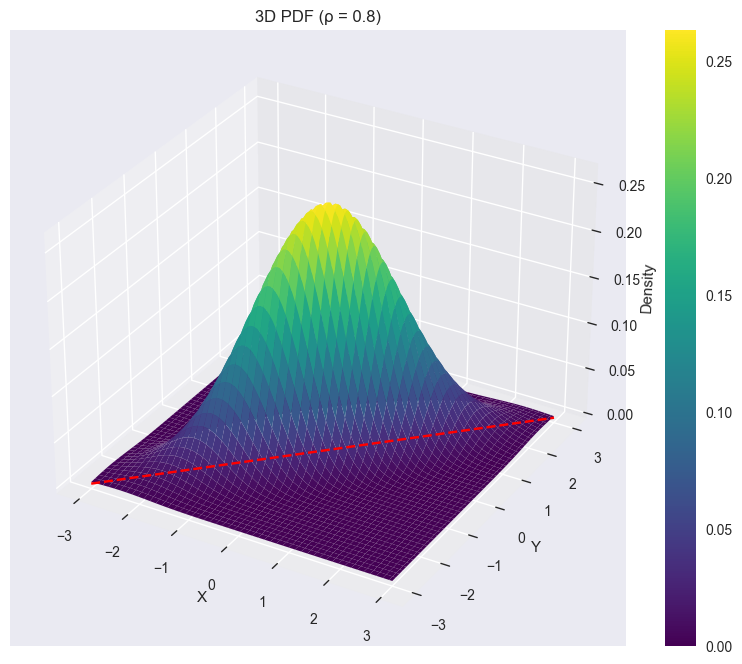

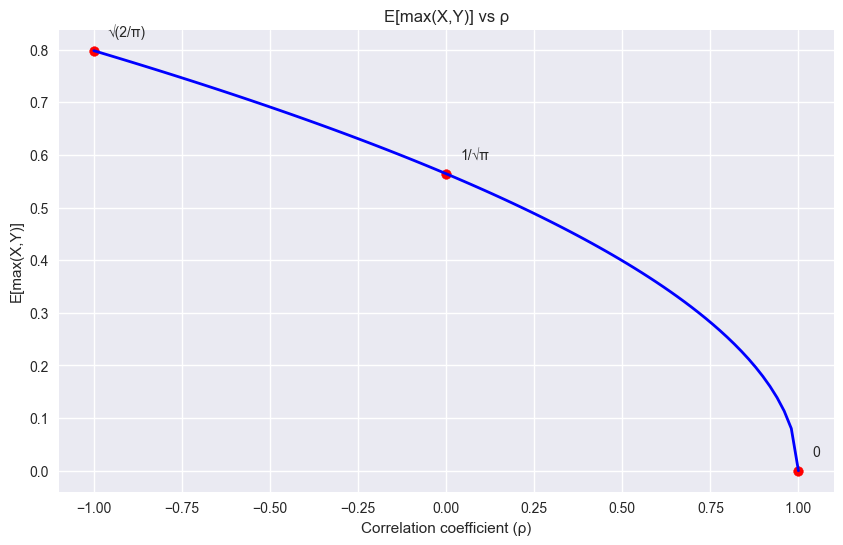

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set style for better visualization
plt.style.use('seaborn-v0_8')
np.random.seed(42)  # For reproducibility

def plot_bivariate_distribution(rho, n_points=1000):
    """
    Creates scatter plot and contour plot for bivariate normal distribution
    with correlation coefficient rho
    """
    # Create covariance matrix
    cov = [[1, rho], [rho, 1]]
    
    # Generate samples
    samples = np.random.multivariate_normal([0, 0], cov, n_points)
    
    # Create grid for contour plot
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    
    # Calculate PDF
    rv = multivariate_normal([0, 0], cov)
    Z = rv.pdf(pos)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter plot
    ax1.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
    ax1.set_title(f'Scatter Plot (ρ = {rho})')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.plot([-3, 3], [-3, 3], 'r--', label='y = x')  # Add y=x line
    ax1.grid(True)
    ax1.legend()
    ax1.axis('equal')
    
    # Contour plot
    contour = ax2.contour(X, Y, Z, levels=10)
    ax2.set_title(f'Contour Plot (ρ = {rho})')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.plot([-3, 3], [-3, 3], 'r--', label='y = x')  # Add y=x line
    ax2.grid(True)
    ax2.legend()
    ax2.axis('equal')
    plt.colorbar(contour, ax=ax2)
    
    plt.tight_layout()
    return fig

def plot_3d_distribution(rho):
    """
    Creates 3D surface plot of bivariate normal distribution
    """
    # Create grid
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    
    # Calculate PDF
    rv = multivariate_normal([0, 0], [[1, rho], [rho, 1]])
    Z = rv.pdf(pos)
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    
    # Add y=x line projection
    ax.plot([-3, 3], [-3, 3], [0, 0], 'r--', label='y = x')
    
    ax.set_title(f'3D PDF (ρ = {rho})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Density')
    
    plt.colorbar(surf, ax=ax)
    return fig

def plot_expected_max():
    """
    Plots E[max(X,Y)] as a function of ρ
    """
    rhos = np.linspace(-1, 1, 100)
    expected_max = np.sqrt((1 - rhos) / np.pi)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(rhos, expected_max, 'b-', linewidth=2)
    ax.set_title('E[max(X,Y)] vs ρ')
    ax.set_xlabel('Correlation coefficient (ρ)')
    ax.set_ylabel('E[max(X,Y)]')
    ax.grid(True)
    
    # Add some special points
    special_rhos = [-1, 0, 1]
    special_values = np.sqrt((1 - np.array(special_rhos)) / np.pi)
    ax.scatter(special_rhos, special_values, color='red')
    
    # Add annotations for special points
    annotations = ['√(2/π)', '1/√π', '0']
    for rho, val, ann in zip(special_rhos, special_values, annotations):
        ax.annotate(ann, (rho, val), xytext=(10, 10),
                   textcoords='offset points')
    
    return fig

# Generate plots for different values of ρ
rho_values = [-0.8, 0, 0.8]
for rho in rho_values:
    plot_bivariate_distribution(rho)
    plot_3d_distribution(rho)

# Plot E[max(X,Y)]
plot_expected_max()

plt.show()